In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('dec_flights.pickle','rb') as read_file:
    dec_flights = pickle.load(read_file)

In [3]:
dec_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492205 entries, 0 to 492204
Data columns (total 24 columns):
date                   492205 non-null datetime64[ns]
day_of_week            492205 non-null int64
airline                492205 non-null object
airline_name           492205 non-null object
origin_airport         492205 non-null object
dest_airport           492205 non-null object
scheduled_dep          484111 non-null datetime64[ns]
dep_time               492205 non-null object
dep_delay              492205 non-null float64
dep_delay_indict       492205 non-null float64
scheduled_arr          484111 non-null datetime64[ns]
arr_time               492205 non-null object
arr_delay              492205 non-null float64
arr_delayed_indict     492205 non-null float64
air_time               492205 non-null float64
num_flights            492205 non-null float64
distance               492205 non-null float64
carrier_delay          492205 non-null float64
weather_delay          492205 

In [4]:
dec_flights['scheduled_dep_hr'] = dec_flights['scheduled_dep'].dt.hour

In [5]:
dec_flights['scheduled_arr_hr'] = dec_flights['scheduled_arr'].dt.hour

In [6]:
dec_flights['total_delay'] = dec_flights['dep_delay'] + dec_flights['arr_delay']
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
dec_flights['delay_level'] = dec_flights['total_delay'].apply(delay_type)
dec_flights.head()

# dec_flights = dec_flights.loc[dec_flights.month == 12]

,date,day_of_week,airline,airline_name,origin_airport,dest_airport,scheduled_dep,dep_time,dep_delay,dep_delay_indict,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,total_delay,delay_level,scheduled_dep_hr,scheduled_arr_hr
0,2018-12-27,4,UA,United Air Lines Inc.,IAH,FLL,2018-12-25 13:40:00,21:16:00,76.0,1.0,...,966.0,0.0,70.0,0.0,0.0,0.0,146.0,2,13.0,15.0
1,2018-12-27,4,UA,United Air Lines Inc.,SAN,IAH,2018-12-25 20:47:00,16:57:00,204.0,1.0,...,1303.0,0.0,0.0,0.0,0.0,188.0,392.0,2,20.0,23.0
2,2018-12-27,4,UA,United Air Lines Inc.,LGA,IAH,2018-12-25 20:00:00,07:37:00,-5.0,0.0,...,1416.0,0.0,0.0,0.0,0.0,0.0,9.0,1,20.0,22.0
3,2018-12-27,4,UA,United Air Lines Inc.,IAH,LAX,2018-12-25 10:06:00,12:45:00,6.0,0.0,...,1379.0,0.0,0.0,0.0,0.0,0.0,8.0,1,10.0,12.0
4,2018-12-27,4,UA,United Air Lines Inc.,SNA,IAH,2018-12-25 12:40:00,14:00:00,14.0,0.0,...,1346.0,14.0,0.0,1.0,0.0,0.0,29.0,1,12.0,16.0


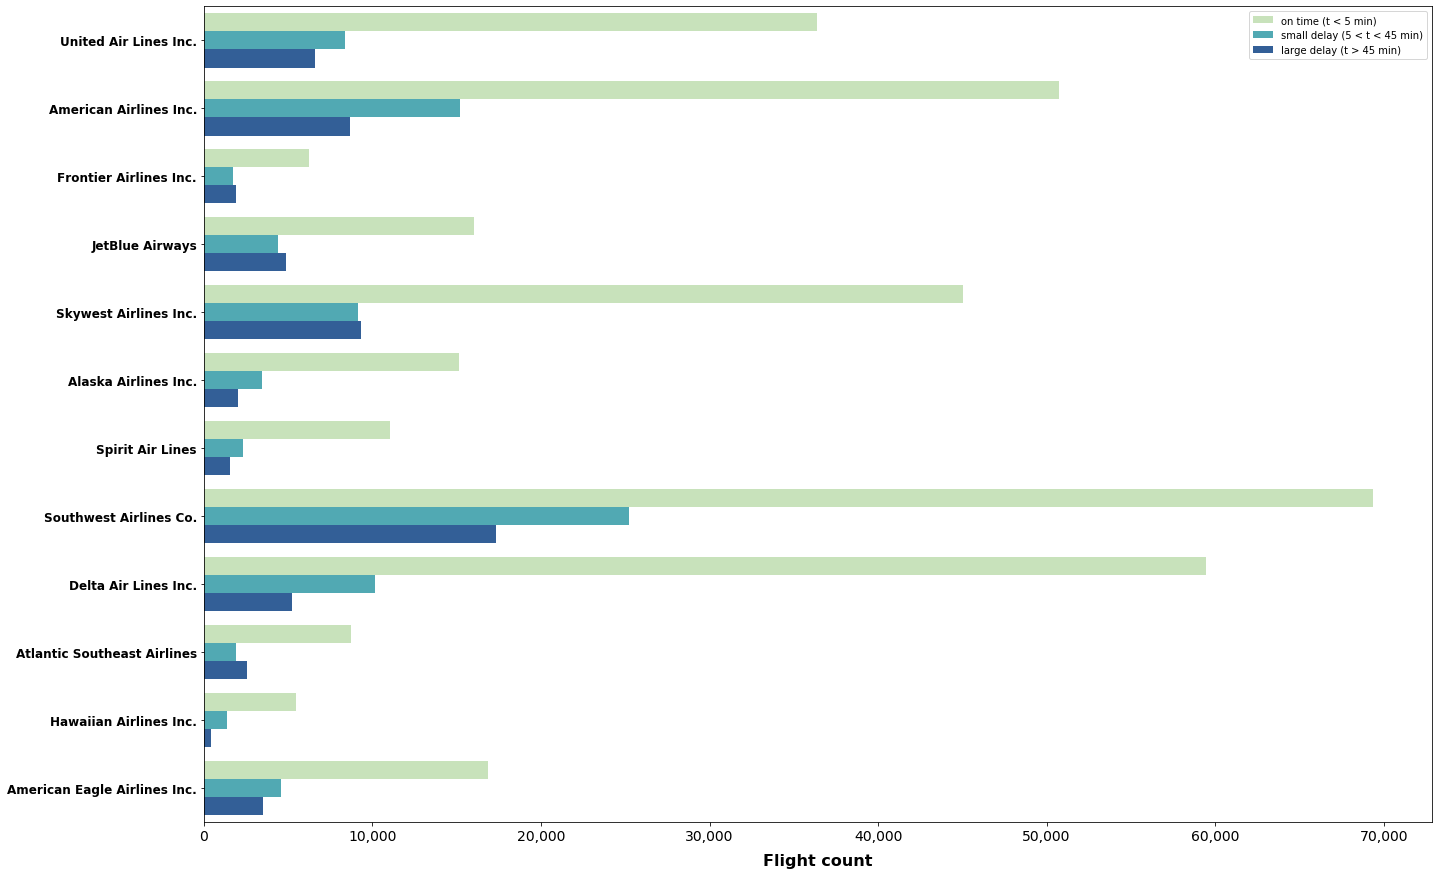

''

<Figure size 432x288 with 0 Axes>

In [7]:
'''graph to depict delays for all airlines'''

fig = plt.figure(1, figsize=(22,15))
ax = sns.countplot(y="airline_name", hue='delay_level', data=dec_flights, palette='YlGnBu')

plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
label_x = ['0','10,000','20,000','30,000','40,000','50,000','60,000','70,000']
ax.set_xticklabels(label_x, fontsize=14)
# plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);

ax.yaxis.label.set_visible(False)
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);

L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')

fig = plt.gcf()
plt.show()
plt.draw()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# fig.savefig('dec_flights_time_nospine.jpg')
;

#### Cheat way to generate pie chart
Note to self: find out the correct way to do it

In [8]:
delay_counts = dec_flights[dec_flights.delay_level == 0].groupby(['airline']).count()
delay_counts['total_delay_counts'] = dec_flights.groupby(['airline'])['delay_level'].count()
delay_counts['delay_level'] = (delay_counts['delay_level'] / delay_counts['total_delay_counts'] * 100).round(1)

delay_counts1 = dec_flights[dec_flights.delay_level == 1].groupby(['airline']).count()
delay_counts['delay_level_1'] = (delay_counts1['delay_level'] / delay_counts['total_delay_counts'] * 100).round(1)

delay_counts2 = dec_flights[dec_flights.delay_level == 2].groupby(['airline']).count()
delay_counts['delay_level_2'] = (delay_counts2['delay_level'] / delay_counts['total_delay_counts'] * 100).round(1)

delay_counts = delay_counts[['delay_level', 'delay_level_1','delay_level_2']]
delay_counts['total_delay_counts'] = dec_flights.groupby(['airline'])['delay_level'].count()

In [9]:
print(dec_flights['delay_level'].count())
print(dec_flights['delay_level'].value_counts())

492205
0    340420
1     87834
2     63951
Name: delay_level, dtype: int64


In [10]:
print(340420/492205*100)
print(87834/492205*100)
print(63951/492205*100)

69.16223931085625
17.845003606220985
12.992757082922765


''

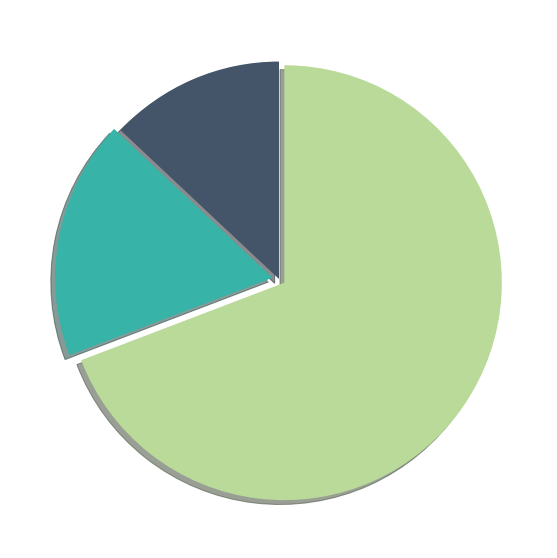

In [11]:
fig = plt.figure(1, figsize=(10,10))

x = (13.0, 17.8, 69.2)
label = ['large delay', 'small delay', 'on time']
color = ['#445469', '#37B3A8', '#B9DA98']
explode = (0, 0.03, 0.03)
plt.pie(x,  colors=color,shadow=True, startangle=90, explode=explode)

fig.savefig('pie_chart_copy.jpg', transparent=True)
;

### More cleaning for modelling

In [4]:
#all flights more than 5 mins delayed
dec_flights['delay_level'].replace(2,1, inplace=True)

''

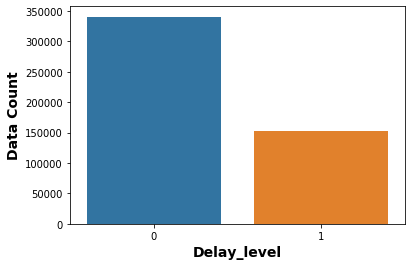

In [9]:
#check for class imbalance
sns.countplot(dec_flights['delay_level'])

plt.ylabel('Data Count', fontsize=14, weight='bold')
plt.xlabel('Delay_level', fontsize=14, weight='bold')

plt.savefig("class_imbalance.jpg")
;

In [14]:
dec_flights.head()

,date,day_of_week,airline,airline_name,origin_airport,dest_airport,scheduled_dep,dep_time,dep_delay,dep_delay_indict,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,total_delay,delay_level,scheduled_dep_hr,scheduled_arr_hr
0,2018-12-27,4,UA,United Air Lines Inc.,IAH,FLL,2018-12-25 13:40:00,21:16:00,76.0,1.0,...,966.0,0.0,70.0,0.0,0.0,0.0,146.0,1,13.0,15.0
1,2018-12-27,4,UA,United Air Lines Inc.,SAN,IAH,2018-12-25 20:47:00,16:57:00,204.0,1.0,...,1303.0,0.0,0.0,0.0,0.0,188.0,392.0,1,20.0,23.0
2,2018-12-27,4,UA,United Air Lines Inc.,LGA,IAH,2018-12-25 20:00:00,07:37:00,-5.0,0.0,...,1416.0,0.0,0.0,0.0,0.0,0.0,9.0,1,20.0,22.0
3,2018-12-27,4,UA,United Air Lines Inc.,IAH,LAX,2018-12-25 10:06:00,12:45:00,6.0,0.0,...,1379.0,0.0,0.0,0.0,0.0,0.0,8.0,1,10.0,12.0
4,2018-12-27,4,UA,United Air Lines Inc.,SNA,IAH,2018-12-25 12:40:00,14:00:00,14.0,0.0,...,1346.0,14.0,0.0,1.0,0.0,0.0,29.0,1,12.0,16.0


In [15]:
#undersampling of 0 needed, use a separate notebook to test if it changes results

In [16]:
dec_flights.loc[dec_flights['carrier_delay']>1]=1
dec_flights['carrier_delay'].astype(int)

dec_flights.loc[dec_flights['weather_delay']>1]=1
dec_flights['weather_delay'].astype(int)

dec_flights.loc[dec_flights['late_aircraft_delay']>1]=1
dec_flights['late_aircraft_delay'].astype(int)

dec_flights.loc[dec_flights['nas_delay']>1]=1
dec_flights['nas_delay'].astype(int)

dec_flights.loc[dec_flights['security_delay']>1]=1
dec_flights['security_delay'].astype(int)

0         1
1         1
2         0
3         0
4         1
5         1
6         1
7         0
8         1
9         1
10        0
11        0
12        0
13        1
14        0
15        1
16        1
17        0
18        0
19        0
20        0
21        1
22        0
23        0
24        0
25        1
26        0
27        1
28        0
29        0
         ..
492175    1
492176    1
492177    0
492178    0
492179    1
492180    0
492181    0
492182    0
492183    0
492184    0
492185    0
492186    0
492187    0
492188    1
492189    0
492190    0
492191    0
492192    0
492193    0
492194    1
492195    0
492196    0
492197    0
492198    0
492199    0
492200    0
492201    1
492202    0
492203    0
492204    0
Name: security_delay, Length: 492205, dtype: int64

In [17]:
dec_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492205 entries, 0 to 492204
Data columns (total 26 columns):
date                   492205 non-null object
day_of_week            492205 non-null int64
airline                492205 non-null object
airline_name           492205 non-null object
origin_airport         492205 non-null object
dest_airport           492205 non-null object
scheduled_dep          485014 non-null object
dep_time               492205 non-null object
dep_delay              492205 non-null float64
dep_delay_indict       492205 non-null float64
scheduled_arr          485014 non-null object
arr_time               492205 non-null object
arr_delay              492205 non-null float64
arr_delayed_indict     492205 non-null float64
air_time               492205 non-null float64
num_flights            492205 non-null float64
distance               492205 non-null float64
carrier_delay          492205 non-null float64
weather_delay          492205 non-null float64
nas_del

#### One hot encoding

In [18]:
#day_of_week
dec_flights.replace({'day_of_week': {1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat', 7:'sun'}}, inplace=True)
dec_flights['day_of_week'].head()

0    mon
1    mon
2    thu
3    thu
4    mon
Name: day_of_week, dtype: object

In [19]:

drop_airport = ['OAK', 'PBI', 'RSW', 'MYR', 'ANC', 'OGG', 'KOA', 'FAI', 'JNU','OTZ', 'SCC', 'BRW', 'OME', 'BET', 'ADK',
                'CDV', 'ADQ', 'SJU', 'CLE', 'OMA', 'PIT', 'SAT', 'BDL', 'SNA', 'BUF', 'ALB', 'BZN', 'JAC', 'CMH', 'OKC', 
                'IND', 'RIC', 'EGE','SRQ','STT', 'HDN', 'MTJ', 'ICT', 'DSM', 'GRR', 'MDT', 'ROC', 'BTR', 'MSN', 'AGS', 
                'JAX', 'CHS', 'SDF', 'ABQ', 'PVD','TUL', 'ORF', 'BTV', 'MEM', 'TUS', 'FSD', 'CVG', 'LIT', 'MKE','COS', 
                'BHM', 'DAY', 'ELP', 'STX', 'PNS', 'XNA', 'PWM', 'SYR', 'GSO', 'ILM', 'DAB', 'TTN', 'FAR', 'BMI', 'TYS', 
                'CID', 'PHF','HPN', 'SAV', 'ASE', 'AVL', 'CHO', 'PIA', 'MLI', 'SGF', 'SBN', 'FWA', 'GRB', 'LNK', 'LEX', 
                'ATW', 'FNT', 'CAK', 'RST', 'CHA', 'ABE', 'EVV', 'CAE', 'VPS', 'SHV', 'LFT', 'MOB', 'CRW', 'MGM','MLU', 
                'GSP', 'MHT', 'ECP', 'MLB', 'HSV', 'JAN', 'TLH', 'GPT','TRI', 'EYW', 'AVP', 'GNV', 'ROA', 'FAY', 'OAJ', 
                'SCE', 'ELM', 'DHN', 'AEX', 'VLD', 'BQK', 'CSG', 'EWN', 'GRK', 'GTR', 'ABY','FSM', 'LBB', 'LGB', 
                'HRL', 'GEG', 'EUG', 'ISP', 'YAK', 'MAF','AMA', 'RNO', 'BOI', 'BIL', 'LIH', 'GUC', 'PSP', 'FAT', 
                'ONT', 'MOT', 'SBA', 'IDA', 'BIS', 'MSO', 'BUR', 'MFR', 'BFL', 'RDM','RAP', 'COD', 'PSC', 'CPR',
                'GCC', 'LAR', 'DRO', 'ISN', 'HLN','GTF', 'HYS', 'RKS', 'SUN', 'FCA', 'GJT', 'MMH', 'JMS', 'SGU',
                'DVL', 'MFE', 'SPI', 'SAF', 'CRP', 'BRO', 'TYR', 'LAW', 'PIB','BPT', 'MEI', 'LRD', 'GGG', 'CLL',
                'LCH', 'MHK', 'SPS', 'SJT','ACT', 'GCK', 'TXK', 'JLN', 'ROW', 'CMI', 'COU', 'GRI', 'ABI','ESC',
                'PLN', 'CIU', 'MBS', 'LAN', 'TVC', 'APN', 'AZO', 'BGM','ITH', 'MQT', 'BGR', 'BQN', 'ORH', 'SWF', 
                'PBG', 'IAG', 'ACY','LBE', 'INL', 'GUM', 'ITO', 'BLI', 'PPG', 'HOB', 'RHI', 'HIB','PSE', 'KTN', 
                'SIT', 'PSG', 'WRG', 'MRY', 'SBP', 'ABR', 'BJI','DLH', 'IMT', 'BRD', 'GFK', 'LSE', 'EAU', 'PAH', 
                'MKG', 'CMX','CWA', 'ERI', 'SUX', 'ALO', 'DBQ', 'TOL', 'YUM', 'FLG', 'ACV','SMX', 'RDD', 'OTH',
                'TWF', 'EKO', 'BTM', 'PIH', 'LWS', 'CDC','UST','DAL','BNA','AUS','STL','SJC','HOU','OAK','MSY','RDU','SMF']

In [20]:
dec_flights = pd.concat([dec_flights, pd.get_dummies(dec_flights['airline'],drop_first=True,prefix="airline")],axis=1)

In [21]:
dec_flights = pd.concat([dec_flights,pd.get_dummies(dec_flights['day_of_week'],drop_first=True,prefix="dow")],axis=1)

In [22]:
dec_flights['origin_airport'].replace(drop_airport, 'OTHERS', inplace=True)

In [23]:
dec_flights = pd.concat([dec_flights, pd.get_dummies(dec_flights['origin_airport'],drop_first=True, prefix='origin')],axis=1)

In [24]:
dec_flights = pd.concat([dec_flights,pd.get_dummies(dec_flights['scheduled_dep_hr'],drop_first=True,prefix="depart")],axis=1)

In [25]:
dec_flights['dest_airport'].replace(drop_airport, 'OTHERS', inplace=True)

In [26]:
dec_flights = pd.concat([dec_flights, pd.get_dummies(dec_flights['dest_airport'],drop_first=True, prefix='dest')],axis=1)

In [27]:
dec_flights.columns

Index(['date', 'day_of_week', 'airline', 'airline_name', 'origin_airport',
       'dest_airport', 'scheduled_dep', 'dep_time', 'dep_delay',
       'dep_delay_indict',
       ...
       'dest_SFO', 'dest_SHD', 'dest_SLC', 'dest_SLN', 'dest_SPN', 'dest_STS',
       'dest_SWO', 'dest_TPA', 'dest_UIN', 'dest_VEL'],
      dtype='object', length=173)

In [28]:
dec_flights.drop(columns=['date','day_of_week','airline','airline_name','origin_airport','dest_airport','scheduled_dep','dep_time','dep_delay','scheduled_arr',
                         'arr_time', 'arr_delay','total_delay','scheduled_dep_hr'], inplace=True)

In [29]:
dec_flights.columns

Index(['dep_delay_indict', 'arr_delayed_indict', 'air_time', 'num_flights',
       'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay',
       ...
       'dest_SFO', 'dest_SHD', 'dest_SLC', 'dest_SLN', 'dest_SPN', 'dest_STS',
       'dest_SWO', 'dest_TPA', 'dest_UIN', 'dest_VEL'],
      dtype='object', length=159)

In [30]:
with open('dec_flights_model_copy.pickle', 'wb') as to_write:
    pickle.dump(dec_flights, to_write)
    
# with open('dec_flights.pickle','rb') as read_file:
#     dec_flights = pickle.load(read_file)